In [ ]:
import atoti as tt

In [2]:
session = tt.Session()

In [3]:
session = tt.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"]
)

Closing existing "Unnamed" session to create the new one.


In [4]:
session.link()

/opt/homebrew/lib/python3.11/site-packages/atoti_core/_link.py:27: FutureWarning: Calling `Session.link()` is deprecated, just access the `Session.link` property instead. Use `session.link / 'some_path'` to add a path to the linked URL.
  deprecated(


http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

In [5]:
product_tbl = session.create_table(
    name="Products",
    types={
        "ProductId": tt.type.STRING,
        "ProductName": tt.type.STRING,
        "ProductCategory": tt.type.STRING,
        "Supplier": tt.type.STRING,
        "PurchasingPricePerUnit": tt.type.FLOAT,
    },
    keys=["ProductId"],
    # optional. Setting default value to 0 for demonstrative purpose
    default_values={"PurchasingPricePerUnit": 0},
)

product_tbl.head()

,ProductName,ProductCategory,Supplier,PurchasingPricePerUnit
ProductId,,,,


In [6]:
orders_tbl = session.read_csv("Orders.csv")
orders_tbl.head()

,OrderId,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
0,1,18/2/2019,650,22.42,Freight United,994,18336,c4411
1,7,18/2/2019,25,52.77,Freight United,916,18637,c3851
2,19,18/2/2019,971,11.1,Freight United,708,18422,c1891
3,42,18/2/2019,300,20.5,The Transporter,955,18594,c2507
4,70,18/2/2019,496,34.48,The Transporter,682,63528,c2843


In [7]:
orders_tbl

In [8]:
orders_tbl["SellingPricePerUnit"].data_type

'double'

In [9]:
for col in orders_tbl.columns:
    print(f"{col} is a numerical type column.") if orders_tbl[col].data_type in [
        "int",
        "double",
        "float",
        "int[]",
        "double[]",
    ] else print(f"{col} is a hierarchical type column.")

OrderId is a numerical type column.
OrderDate is a hierarchical type column.
QuantitySold is a numerical type column.
SellingPricePerUnit is a numerical type column.
ShipperName is a hierarchical type column.
ProductId is a numerical type column.
EmployeeId is a numerical type column.
CustomerId is a hierarchical type column.


In [10]:
# del session.tables["Orders"]
del session.tables[orders_tbl.name]

In [11]:
orders_tbl = session.read_csv(
    "Orders.csv",
    table_name="Orders",
    columns={
        "OrderId": "Order Id",
        "OrderDate": "Order Date",
        "QuantitySold": "Quantity Sold",
        "SellingPricePerUnit": "Selling Price Per Unit",
        "ShipperName": "Shipper Name",
        "ProductId": "Product Id",
    },
    keys=["Order Id", "Product Id"],
    types={
        "Order Id": tt.type.STRING,
        "Product Id": tt.type.STRING,
        "Order Date": tt.type.LOCAL_DATE,
    },
    date_patterns={"Order Date": "dd/M/yyyy"},
    default_values={"Quantity Sold": 0, "Selling Price Per Unit": 0.0},
)

In [12]:
orders_tbl.join(product_tbl, (orders_tbl["Product Id"] == product_tbl["ProductId"]))

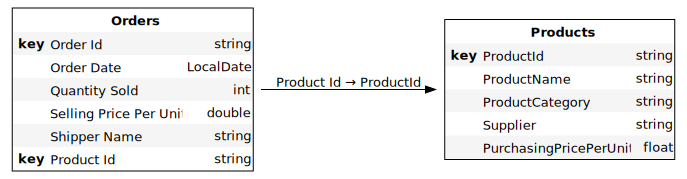

In [13]:
session.tables.schema

In [14]:
cube = session.create_cube(orders_tbl, name="Order Cube")

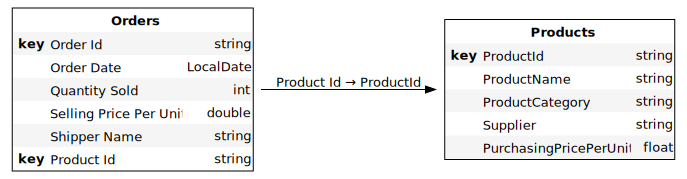

In [15]:
cube.schema

In [16]:
cube

In [17]:
cube.measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x11fd50e10>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x11fd50950>, 'Quantity Sold.MEAN': <atoti.measure.Measure object at 0x11fd50c10>, 'Quantity Sold.SUM': <atoti.measure.Measure object at 0x11fd50ad0>, 'Selling Price Per Unit.MEAN': <atoti.measure.Measure object at 0x11fd50b50>, 'Selling Price Per Unit.SUM': <atoti.measure.Measure object at 0x11fd50a90>}

In [18]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

In [19]:
h["Order Date"]

In [20]:
cube.hierarchies["Product Tree"] = [
    product_tbl["ProductCategory"],
    product_tbl["ProductName"],
]

In [21]:
cube.create_date_hierarchy(
    "Date Hierarchy",
    column=orders_tbl["Order Date"],
    levels={"Year": "yyyy", "Month": "MM"},
)
h["Date Hierarchy"] = {
    **h["Date Hierarchy"].levels,
    "Order Date": orders_tbl["Order Date"],
}

In [ ]:
session.visualize("Single-level hierarchies exploration")

/opt/homebrew/lib/python3.11/site-packages/atoti_core/base_session.py:113: FutureWarning: `Session.visualize()` is deprecated, use `Session.widget` instead.
  deprecated("`Session.visualize()` is deprecated, use `Session.widget` instead.")


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.